# 1. Импорт библиотек

In [150]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
import shap

%matplotlib inline

# 2. Загрузка данных

In [107]:
df = pd.read_csv('Europe Hotel Booking Satisfaction Score.csv')

In [108]:
df

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,23,business,Group Travel,Individual/Couple,2,1,2,3,2,2,2,2,3,2,neutral or dissatisfied
103900,73097,Male,49,tourism,Group Travel,Group bookings,4,4,4,4,2,5,5,5,5,4,satisfied
103901,68825,Male,30,tourism,Group Travel,Group bookings,1,1,1,3,4,5,4,5,5,4,neutral or dissatisfied
103902,54173,Female,22,business,Group Travel,Individual/Couple,1,1,1,5,1,1,1,5,4,1,neutral or dissatisfied


In [109]:
df['satisfaction'].value_counts(normalize=True)

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

Выборка близка к сбалансированной, поэтому будет вполне уместно использовать accuracy

# 3. Анализ данных и подготовка признаков

## int-признаки

In [110]:
df_int = df.select_dtypes(include=['int64']).drop(columns='id')
int_features = df_float.columns

In [111]:
df_int

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness
0,13,3,4,3,1,5,5,5,4,5,5
1,25,3,2,3,3,1,1,1,1,4,1
2,26,2,2,2,2,5,5,5,4,4,5
3,25,2,5,5,5,2,2,2,1,4,2
4,61,3,3,3,3,4,5,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
103899,23,2,1,2,3,2,2,2,2,3,2
103900,49,4,4,4,4,2,5,5,5,5,4
103901,30,1,1,1,3,4,5,4,5,5,4
103902,22,1,1,1,5,1,1,1,5,4,1


## Категориальные признаки
Воспользуемся LabelEncoder

In [112]:
df_cat = df.select_dtypes(include=['object']).drop(columns=['satisfaction'])
cat_features = df_cat.columns

In [113]:
for i in list(cat_features):
    labelencoder = LabelEncoder()
    df[i] = labelencoder.fit_transform(df[i])

In [114]:
df_cat = df[cat_features]

In [115]:
df_cat

,Gender,purpose_of_travel,Type of Travel,Type Of Booking
0,1,1,1,2
1,1,4,0,0
2,0,4,0,0
3,0,4,0,0
4,1,1,0,0
...,...,...,...,...
103899,0,2,0,1
103900,1,4,0,0
103901,1,4,0,0
103902,0,2,0,1


## Посмотрим как связаны численные признаки с целевой переменной

In [116]:
satisfied = df[df['satisfaction'] == 'satisfied'][int_features]
not_satisfied = df[df['satisfaction'] == 'neutral or dissatisfied'][int_features]

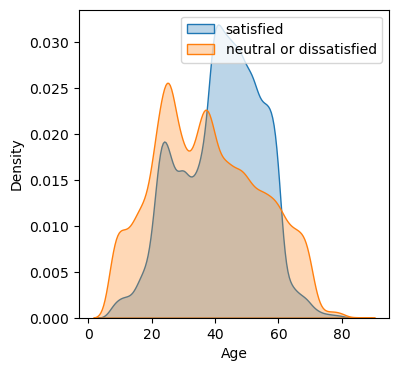

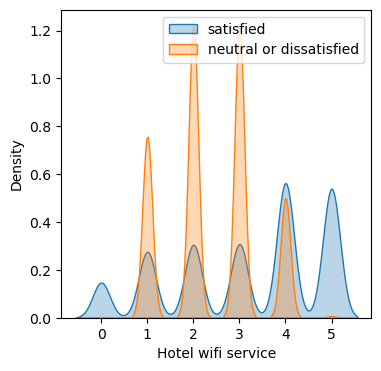

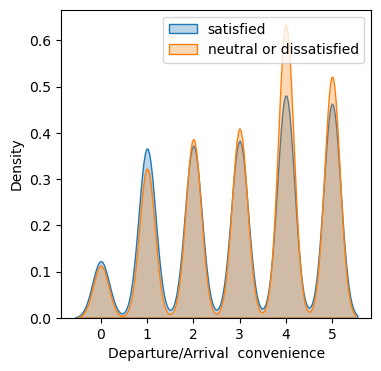

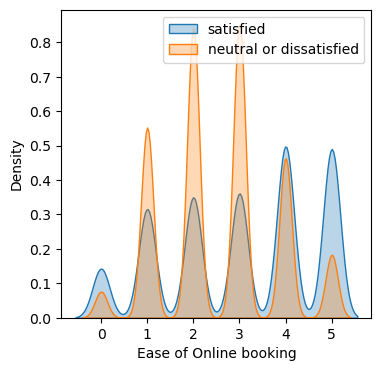

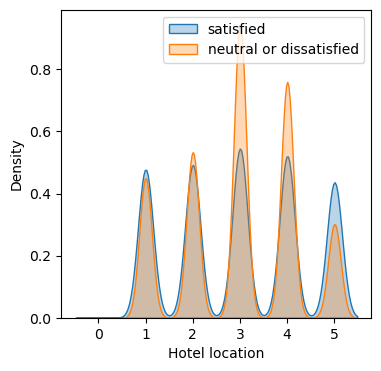

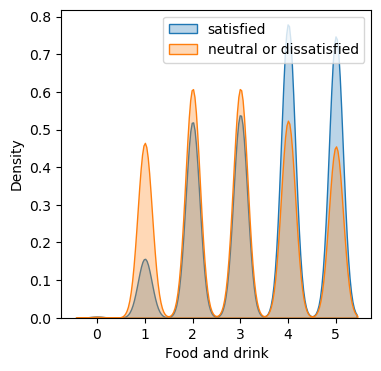

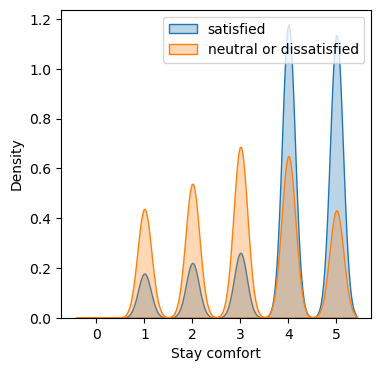

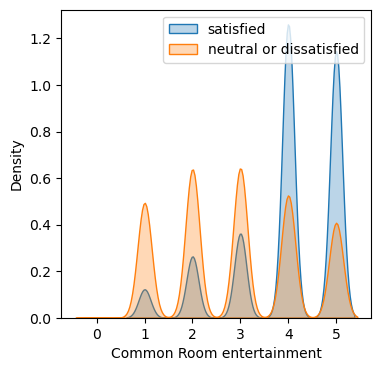

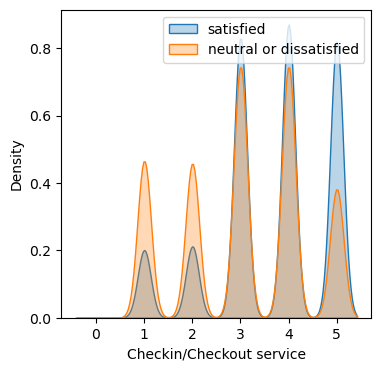

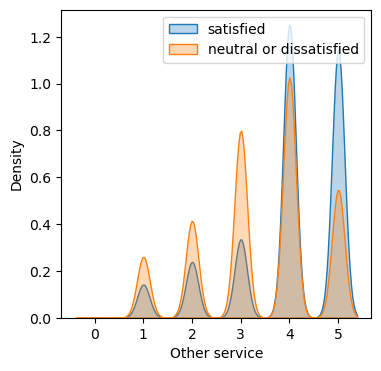

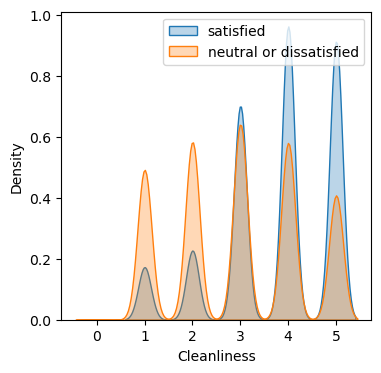

In [117]:
for i in list(int_features):
    fig, axis = plt.subplots(1, 1, figsize=(4, 4))
    sns.kdeplot(satisfied[i], label='satisfied', alpha=0.3, shade=True)
    sns.kdeplot(not_satisfied[i], label='neutral or dissatisfied', alpha=0.3, shade=True)
    plt.legend()

Видно, что линейная регрессия вряд ли даст хорошее качество

## Теперь посмотрим для категориальных признаков

In [119]:
satisfied = df[df['satisfaction'] == 'satisfied'][cat_features]
not_satisfied = df[df['satisfaction'] == 'neutral or dissatisfied'][cat_features]

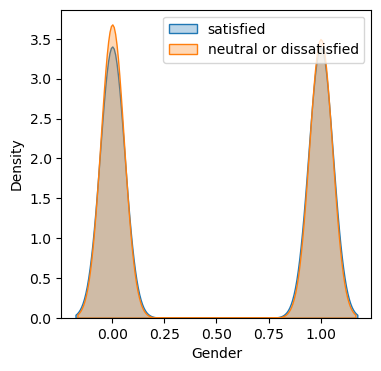

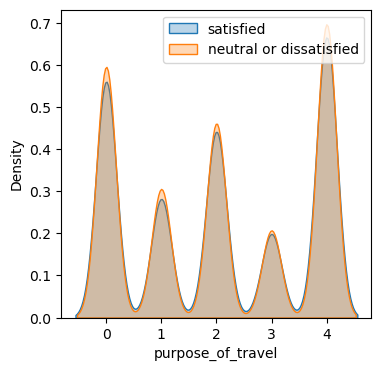

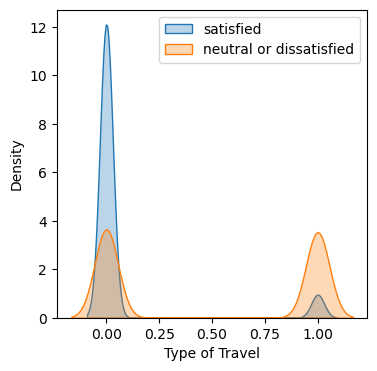

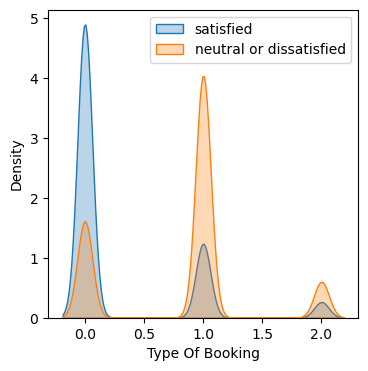

In [120]:
for i in list(cat_features):
    fig, axis = plt.subplots(1, 1, figsize=(4, 4))
    sns.kdeplot(satisfied[i], label='satisfied', alpha=0.3, shade=True)
    sns.kdeplot(not_satisfied[i], label='neutral or dissatisfied', alpha=0.3, shade=True)
    plt.legend()

Вывод: практически не влияют на результат фичи:
1. Gender
2. purpose_of_travel

Удалим их

## Посмотрим корреляции между самими признаками

In [136]:
X = df.drop(columns = ['satisfaction', 'id', 'Gender', 'purpose_of_travel'])
y = df['satisfaction']

In [138]:
X

,Age,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness
0,13,1,2,3,4,3,1,5,5,5,4,5,5
1,25,0,0,3,2,3,3,1,1,1,1,4,1
2,26,0,0,2,2,2,2,5,5,5,4,4,5
3,25,0,0,2,5,5,5,2,2,2,1,4,2
4,61,0,0,3,3,3,3,4,5,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,0,1,2,1,2,3,2,2,2,2,3,2
103900,49,0,0,4,4,4,4,2,5,5,5,5,4
103901,30,0,0,1,1,1,3,4,5,4,5,5,4
103902,22,0,1,1,1,1,5,1,1,1,5,4,1


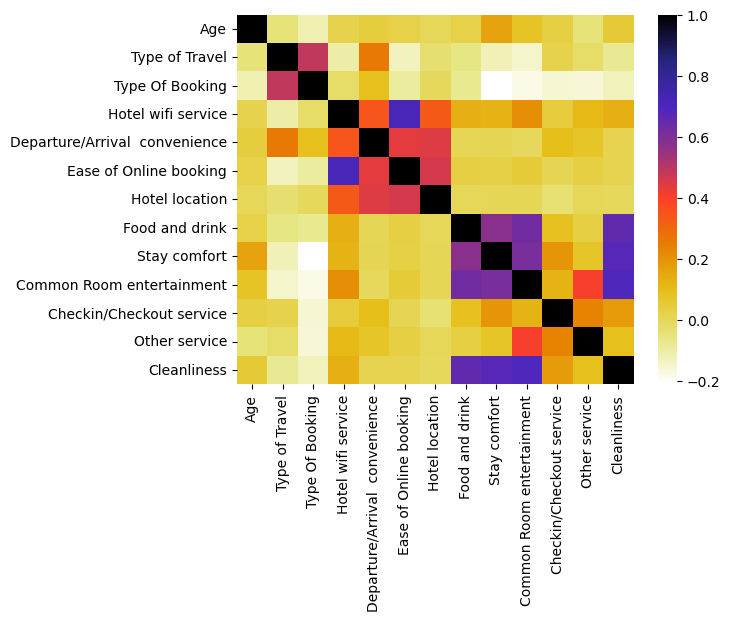

In [141]:
sns.heatmap(X.corr(), annot=False, cmap=plt.cm.CMRmap_r);

Видим, что признаки друг от друга не зависят (коэффициент линейной корреляции меньше 0.8), поэтому не будем дополнительно их удалять

## Найдем feature_importance через CatBoost (не убираем gender и purpose_of_travel)

In [ ]:
X = df.drop(columns = ['satisfaction', 'id'])
y = df['satisfaction']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [127]:
train_pool = Pool(X_train, y_train, cat_features = list(X_train.select_dtypes(include = ['object']).columns))
test_pool = Pool(X_test, y_test, cat_features = list(X_test.select_dtypes(include = ['object']).columns))

In [128]:
model = CatBoostClassifier(random_state=42)

In [129]:
model.fit(train_pool)

Learning rate set to 0.068023
0:	learn: 0.5797987	total: 89.8ms	remaining: 1m 29s
1:	learn: 0.5103987	total: 181ms	remaining: 1m 30s
2:	learn: 0.4464567	total: 286ms	remaining: 1m 35s
3:	learn: 0.4139566	total: 378ms	remaining: 1m 34s
4:	learn: 0.3741169	total: 467ms	remaining: 1m 32s
5:	learn: 0.3540011	total: 563ms	remaining: 1m 33s
6:	learn: 0.3365407	total: 668ms	remaining: 1m 34s
7:	learn: 0.3206760	total: 747ms	remaining: 1m 32s
8:	learn: 0.3069819	total: 833ms	remaining: 1m 31s
9:	learn: 0.2896022	total: 908ms	remaining: 1m 29s
10:	learn: 0.2806418	total: 992ms	remaining: 1m 29s
11:	learn: 0.2723037	total: 1.07s	remaining: 1m 28s
12:	learn: 0.2642233	total: 1.16s	remaining: 1m 27s
13:	learn: 0.2575531	total: 1.23s	remaining: 1m 26s
14:	learn: 0.2511369	total: 1.31s	remaining: 1m 26s
15:	learn: 0.2458167	total: 1.39s	remaining: 1m 25s
16:	learn: 0.2409598	total: 1.48s	remaining: 1m 25s
17:	learn: 0.2369678	total: 1.57s	remaining: 1m 25s
18:	learn: 0.2328509	total: 1.66s	remaining

In [86]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Hotel wifi service,35.622591
1,Type of Travel,12.591721
2,Type Of Booking,11.853913
3,Hotel location,8.674963
4,Common Room entertainment,6.682556
5,Age,4.344073
6,Cleanliness,3.945520
7,Stay comfort,3.542633
8,Departure/Arrival convenience,2.984784
9,Other service,2.793923


Второй раз убедились в неважности данных признаков

## Через Shap

In [130]:
model = CatBoostClassifier(random_state=42)

In [131]:
model.fit(train_pool)

Learning rate set to 0.068023
0:	learn: 0.5797987	total: 94.8ms	remaining: 1m 34s
1:	learn: 0.5103987	total: 191ms	remaining: 1m 35s
2:	learn: 0.4464567	total: 307ms	remaining: 1m 42s
3:	learn: 0.4139566	total: 405ms	remaining: 1m 40s
4:	learn: 0.3741169	total: 498ms	remaining: 1m 39s
5:	learn: 0.3540011	total: 600ms	remaining: 1m 39s
6:	learn: 0.3365407	total: 702ms	remaining: 1m 39s
7:	learn: 0.3206760	total: 796ms	remaining: 1m 38s
8:	learn: 0.3069819	total: 878ms	remaining: 1m 36s
9:	learn: 0.2896022	total: 968ms	remaining: 1m 35s
10:	learn: 0.2806418	total: 1.08s	remaining: 1m 36s
11:	learn: 0.2723037	total: 1.18s	remaining: 1m 37s
12:	learn: 0.2642233	total: 1.28s	remaining: 1m 37s
13:	learn: 0.2575531	total: 1.38s	remaining: 1m 37s
14:	learn: 0.2511369	total: 1.48s	remaining: 1m 37s
15:	learn: 0.2458167	total: 1.58s	remaining: 1m 37s
16:	learn: 0.2409598	total: 1.68s	remaining: 1m 37s
17:	learn: 0.2369678	total: 1.78s	remaining: 1m 37s
18:	learn: 0.2328509	total: 1.88s	remaining

In [132]:
explainer = shap.TreeExplainer(model)

In [133]:
shap_values = explainer.shap_values(X)

In [135]:
feature_importance = np.abs(shap_values).mean(axis=0)
sorted_idx = feature_importance.argsort()[::-1]

In [138]:
feature_importance_df = pd.DataFrame({'feature': np.array(X.columns)[sorted_idx], 'importance': feature_importance[sorted_idx]})

In [139]:
feature_importance_df

,feature,importance
0,Hotel wifi service,2.914211
1,Type of Travel,2.166241
2,Type Of Booking,0.878862
3,Hotel location,0.571759
4,Common Room entertainment,0.404532
5,Stay comfort,0.394691
6,Age,0.377696
7,Other service,0.343973
8,Checkin/Checkout service,0.307348
9,Ease of Online booking,0.262878


В третий раз убедились в том, что данные признаки не важны

# 3. Построение модели-ансамбля и проведение кросс-валидации

In [154]:
X = df.drop(columns = ['satisfaction', 'id', 'Gender', 'purpose_of_travel'])
y = df['satisfaction']

In [159]:
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('cb', CatBoostClassifier(random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

In [160]:
skf = StratifiedKFold(n_splits=5)

In [162]:
score = np.mean(cross_val_score(clf, X, y, cv=skf, scoring='roc_auc'))

Learning rate set to 0.068023
0:	learn: 0.5994927	total: 23.3ms	remaining: 23.3s
1:	learn: 0.5109516	total: 44.6ms	remaining: 22.3s
2:	learn: 0.4444921	total: 65.9ms	remaining: 21.9s
3:	learn: 0.4031460	total: 86.9ms	remaining: 21.6s
4:	learn: 0.3776817	total: 107ms	remaining: 21.3s
5:	learn: 0.3569906	total: 129ms	remaining: 21.3s
6:	learn: 0.3373279	total: 152ms	remaining: 21.6s
7:	learn: 0.3230837	total: 172ms	remaining: 21.3s
8:	learn: 0.3110356	total: 193ms	remaining: 21.3s
9:	learn: 0.2939306	total: 213ms	remaining: 21.1s
10:	learn: 0.2826875	total: 234ms	remaining: 21.1s
11:	learn: 0.2736015	total: 255ms	remaining: 21s
12:	learn: 0.2661836	total: 276ms	remaining: 20.9s
13:	learn: 0.2565581	total: 296ms	remaining: 20.9s
14:	learn: 0.2500290	total: 317ms	remaining: 20.8s
15:	learn: 0.2442085	total: 338ms	remaining: 20.8s
16:	learn: 0.2395890	total: 358ms	remaining: 20.7s
17:	learn: 0.2350738	total: 379ms	remaining: 20.7s
18:	learn: 0.2284677	total: 399ms	remaining: 20.6s
19:	learn

Liblinear failed to converge, increase the number of iterations.


Learning rate set to 0.068023
0:	learn: 0.5993391	total: 23.3ms	remaining: 23.3s
1:	learn: 0.5111913	total: 45.5ms	remaining: 22.7s
2:	learn: 0.4676767	total: 66.7ms	remaining: 22.2s
3:	learn: 0.4210261	total: 87.4ms	remaining: 21.8s
4:	learn: 0.3869591	total: 108ms	remaining: 21.4s
5:	learn: 0.3647325	total: 128ms	remaining: 21.1s
6:	learn: 0.3443534	total: 150ms	remaining: 21.3s
7:	learn: 0.3278547	total: 170ms	remaining: 21s
8:	learn: 0.3129387	total: 190ms	remaining: 21s
9:	learn: 0.3008604	total: 212ms	remaining: 21s
10:	learn: 0.2887468	total: 234ms	remaining: 21s
11:	learn: 0.2759380	total: 256ms	remaining: 21.1s
12:	learn: 0.2682852	total: 276ms	remaining: 21s
13:	learn: 0.2610274	total: 296ms	remaining: 20.9s
14:	learn: 0.2552855	total: 319ms	remaining: 20.9s
15:	learn: 0.2449526	total: 341ms	remaining: 21s
16:	learn: 0.2402346	total: 362ms	remaining: 20.9s
17:	learn: 0.2360947	total: 384ms	remaining: 21s
18:	learn: 0.2329126	total: 405ms	remaining: 20.9s
19:	learn: 0.2285690	

In [163]:
score

0.9911000299018566